In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

In [2]:
df = pd.read_csv("../../Excel Files/data_banknote_authentication.csv")

In [3]:
X = df.drop("Class",axis=1)
y = df["Class"]

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=101)

In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
baseModel = RandomForestClassifier()
paramGrid = {"max_features":[2,3,4],"n_estimators":[64,100,128,200],"bootstrap":[True,False],"oob_score":[True,False]}
gridModel = GridSearchCV(baseModel,paramGrid)

In [5]:
gridModel.fit(X_train,y_train)

C:\Users\anant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
60 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\anant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\anant\AppData\Local\Packages\PythonSoftwareFoundat

,estimator,RandomForestClassifier()
,param_grid,"{'bootstrap': [True, False], 'max_features': [2, 3, ...], 'n_estimators': [64, 100, ...], 'oob_score': [True, False]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,100


In [6]:
gridModel.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 100, 'oob_score': True}

In [7]:
myModel = RandomForestClassifier(max_features=2,n_estimators=200,oob_score=True)

In [8]:
myModel.fit(X_train,y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,2
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,True


In [9]:
yPredictions = myModel.predict(X_test)

In [12]:
from sklearn.metrics import ConfusionMatrixDisplay,classification_report,confusion_matrix

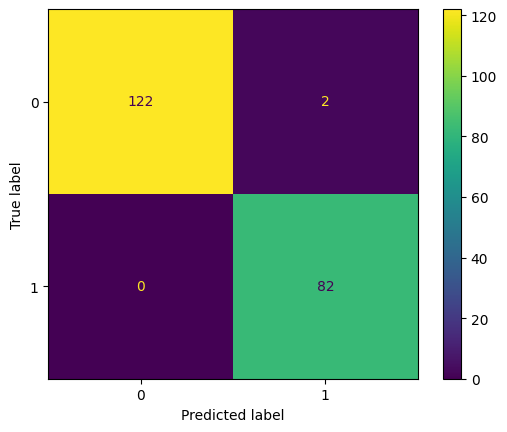

In [16]:
ConfusionMatrixDisplay(confusion_matrix(y_test,yPredictions)).plot(cmap="viridis")
plt.show()

In [20]:
print(classification_report(y_test,yPredictions))
print(myModel.oob_score_)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       124
           1       0.98      1.00      0.99        82

    accuracy                           0.99       206
   macro avg       0.99      0.99      0.99       206
weighted avg       0.99      0.99      0.99       206

0.9931389365351629


In [17]:
errors = []
misClass = []
from sklearn.metrics import accuracy_score
for n in range(1,200):
    r = RandomForestClassifier(n_estimators=n,max_features=2)
    r.fit(X_train,y_train)
    p = r.predict(X_test)
    err = 1 - accuracy_score(y_test,p)
    errors.append(err)
    n_missed = np.sum(p != y_test)
    misClass.append(n_missed)

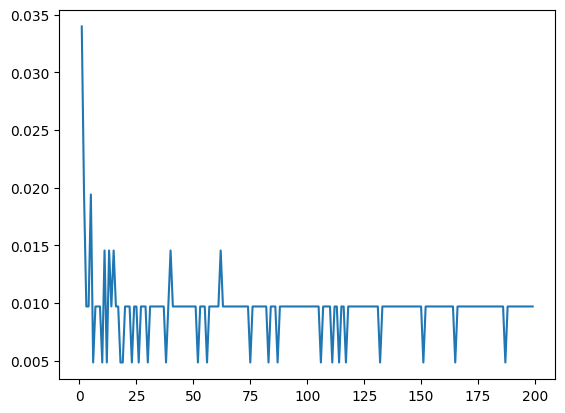

In [18]:
plt.plot(range(1,200),errors)
plt.show()

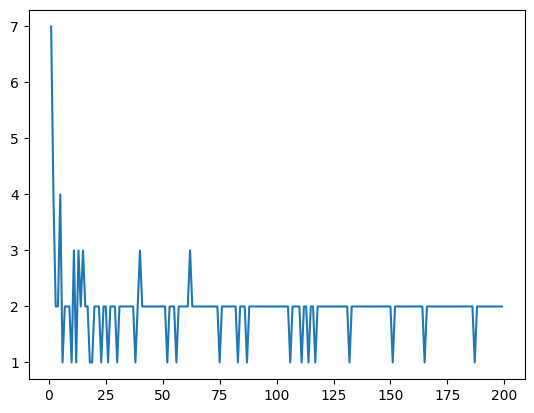

In [19]:
plt.plot(range(1,200),misClass)
plt.show()